In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sales = pd.read_csv(r'C:\Users\Chaim\Desktop\Master M2\Smart_Sales_Dashboard\Smart_Sales_Dashboard\data\clean\sales_clean.csv')
customers = pd.read_csv(r'C:\Users\Chaim\Desktop\Master M2\Smart_Sales_Dashboard\Smart_Sales_Dashboard\data\clean\customers_clean.csv')

Revenue Over Time (Monthly) — Line Chart

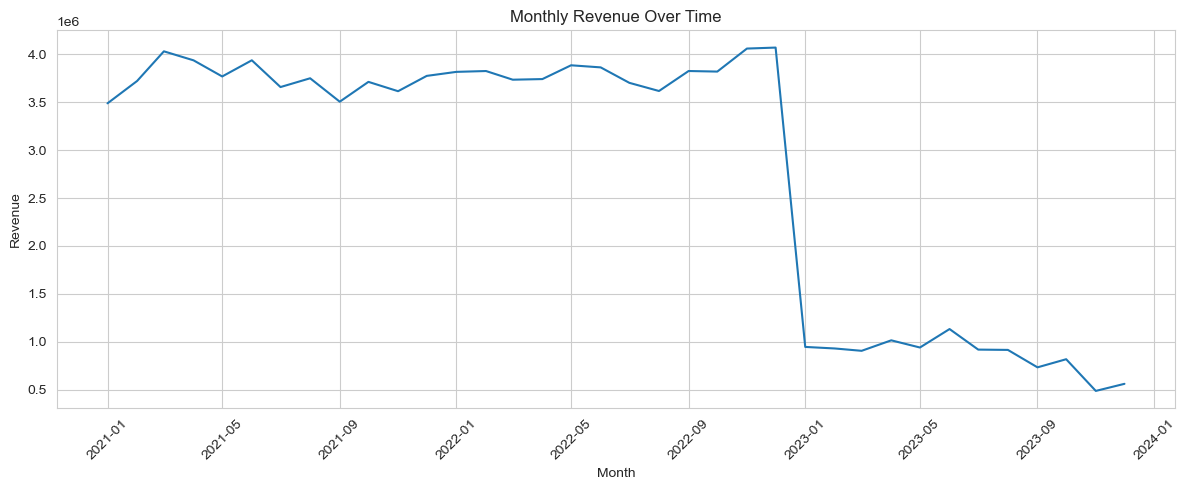

In [5]:


sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], errors='coerce')

# Create month column
sales['month'] = sales['invoice_date'].dt.to_period('M')

# Compute monthly revenue
monthly_rev = sales.groupby('month')['total'].sum().reset_index()
monthly_rev['month'] = monthly_rev['month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_rev['month'], monthly_rev['total'])
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Top 10 Products by Revenue — Bar Chart

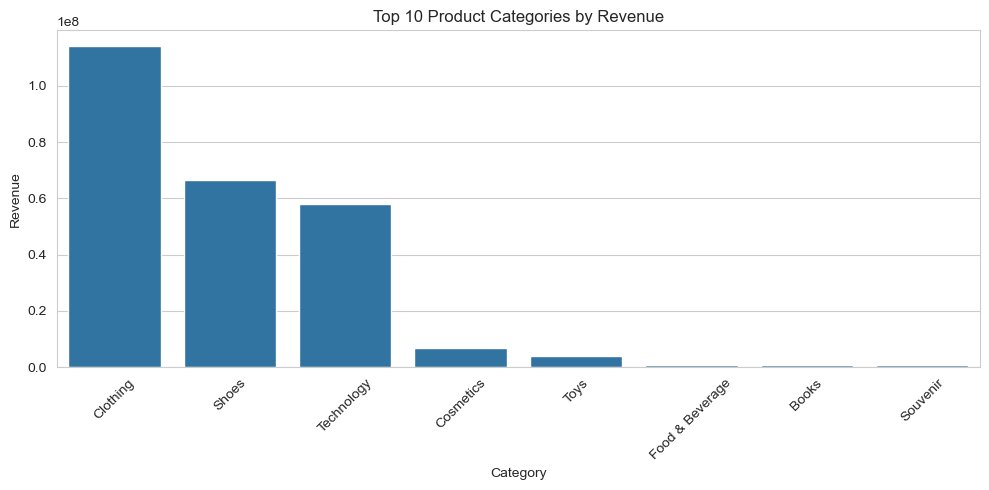

In [6]:
product_rev = sales.groupby('category')['total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=product_rev.index, y=product_rev.values)
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sales by Region (Shopping Mall)

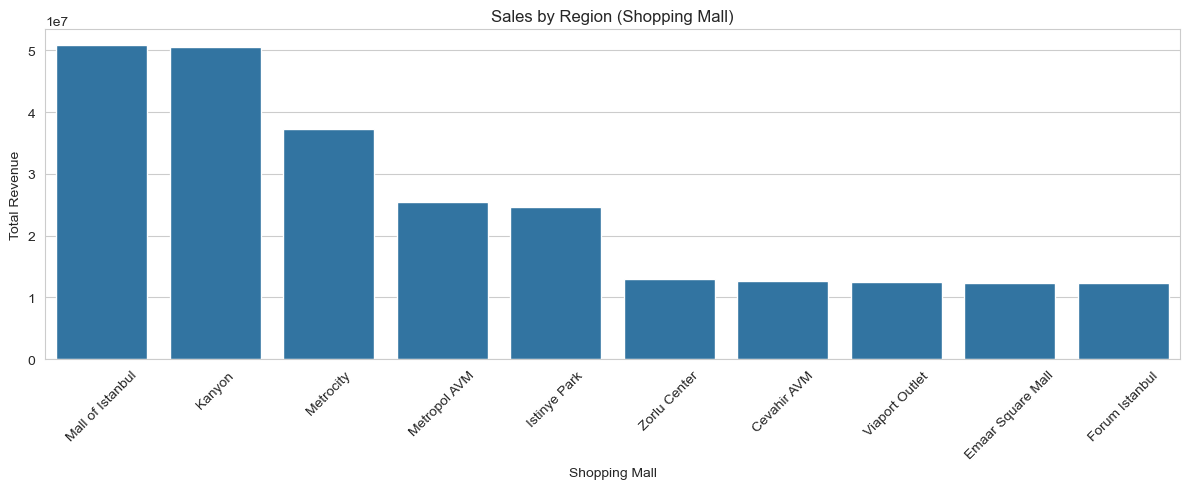

In [7]:
mall_rev = sales.groupby('shopping_mall')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=mall_rev.index, y=mall_rev.values)
plt.title("Sales by Region (Shopping Mall)")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


RFM Metrics + Histograms

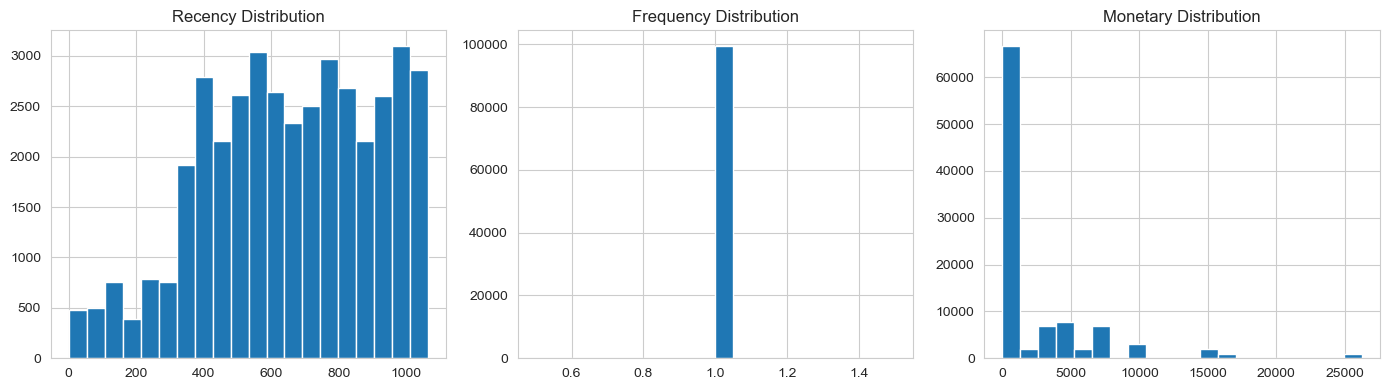

In [8]:
# Reference date for recency
max_date = sales['invoice_date'].max()

rfm = sales.groupby('customer_id').agg({
    'invoice_date': lambda x: (max_date - x.max()).days,   # Recency
    'invoice_no': 'nunique',                               # Frequency
    'total': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.hist(rfm['recency'], bins=20)
plt.title("Recency Distribution")

plt.subplot(1,3,2)
plt.hist(rfm['frequency'], bins=20)
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
plt.hist(rfm['monetary'], bins=20)
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()


Correlation Heatmap (price, quantity, total, recency, frequency)

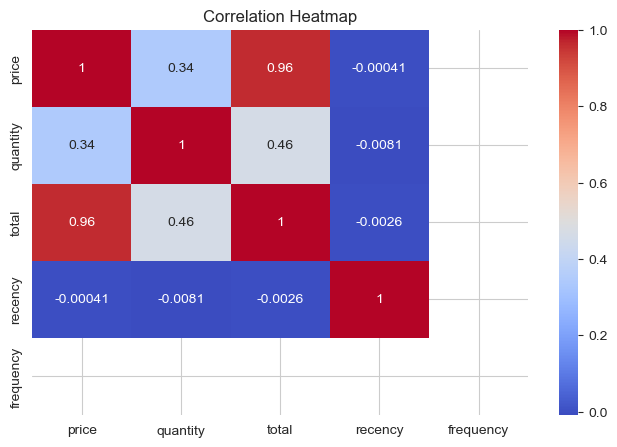

In [9]:
df_corr = sales.merge(rfm, on='customer_id', how='left')
corr_cols = ['price', 'quantity', 'total', 'recency', 'frequency']
corr = df_corr[corr_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
